# Essentials of Data Science

# HEART FAILURE PREDICTION

### Project by:
- Huzaifa Khan (Lead Team Data Science GDSC-UIT)<a href="https://www.linkedin.com/in/huzaifa-khaan/"> LinkedIn</a>
- Syed Moosa Raza Rizvi (Co-Lead Team Data Science GDSC-UIT)<a href="https://www.linkedin.com/in/syed-moosa-raza-rizvi/"> LinkedIn</a>

#### Aim : To classify / predict whether a patient is prone to heart failure depending on multiple attributes. It is a binary classification with multiple numerical and categorical features.

## 1) DATASET INFORMATION

In [65]:
import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


#### Dataset Attributes

Age : age of the patient (years)

Sex : sex of the patient (M: Male, F: Female)

ChestPainType : chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)

RestingBP : resting blood pressure (mm Hg)

Cholesterol : serum cholesterol (mm/dl)

FastingBS : fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)

RestingECG : resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)

MaxHR : maximum heart rate achieved (Numeric value between 60 and 202)

ExerciseAngina : exercise-induced angina (Y: Yes, N: No)

Oldpeak : oldpeak = ST (Numeric value measured in depression)

ST_Slope : the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)

HeartDisease : output class (1: heart disease, 0: Normal)

In [3]:
# (rows, columns)
data.shape

(918, 12)

In [4]:
# Number of null values
data.isnull().count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [5]:
# description of numerical columns
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [6]:
# description of categorical columns
data.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


## 2) EXPLORATORY DATA ANALYSIS AND VISUALIZATION

### Dividing features into Numerical and Categorical

In [7]:
# Lists to store categorical and numerical features
categorical_features = data.select_dtypes(include='object')
numerical_features = data.select_dtypes(exclude='object')

# Print the results
print('Categorical Features:', categorical_features.columns.to_list())
print('Numerical Features:', numerical_features.columns.to_list())


Categorical Features: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Numerical Features: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


### Distribution of Categorical Features

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

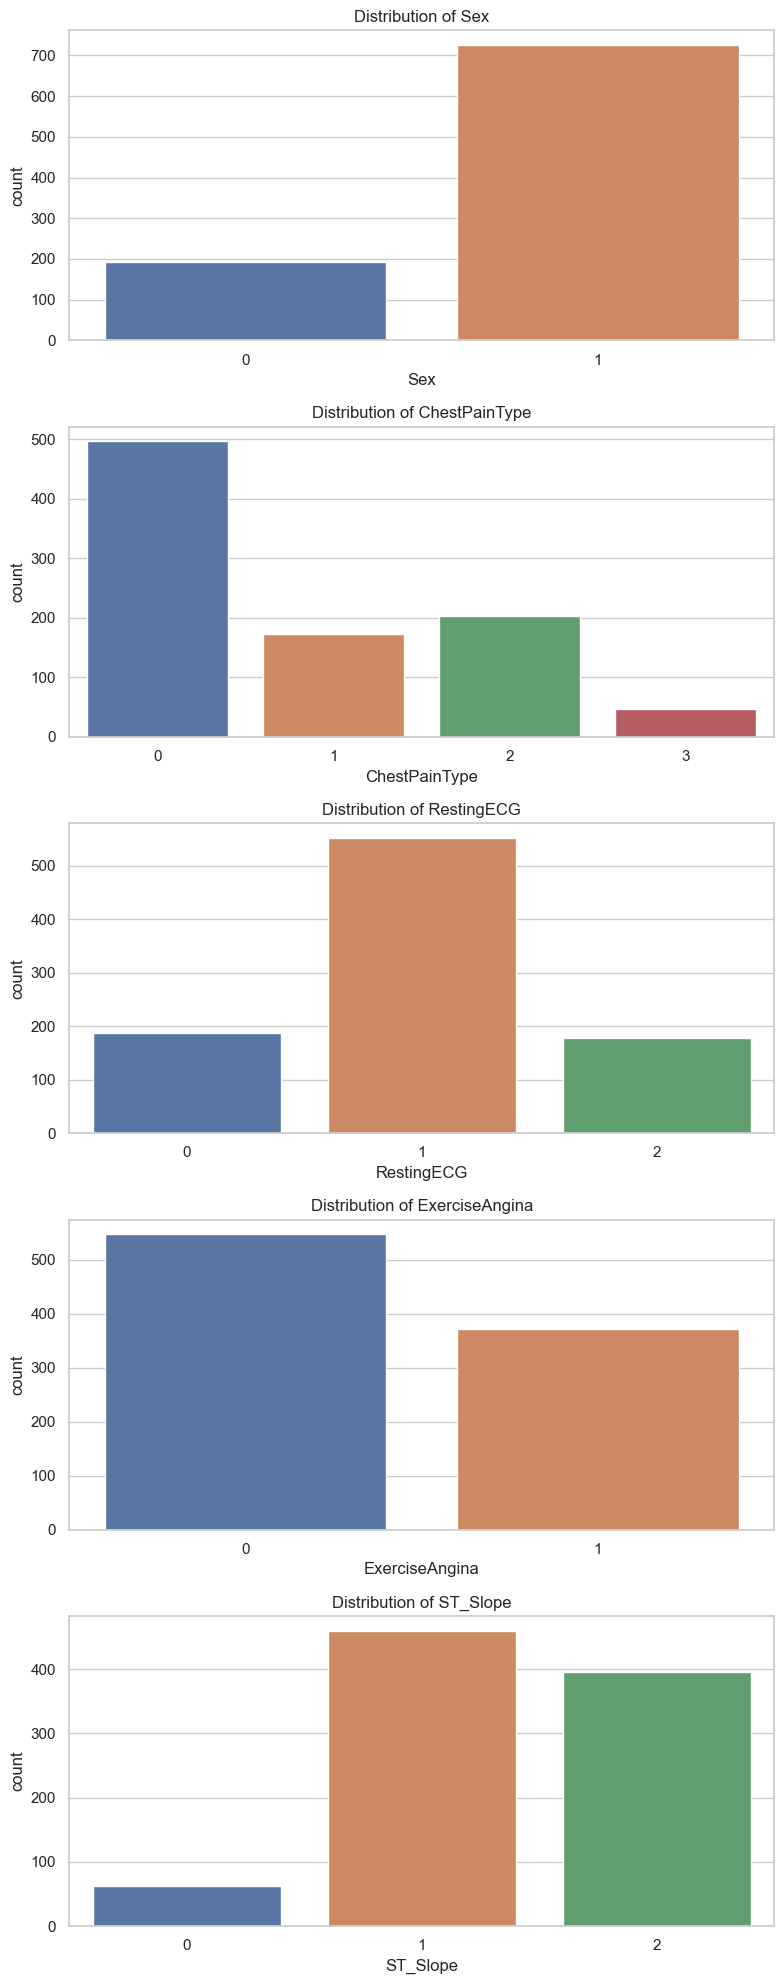

In [67]:
# Set the plot style (optional)
sns.set_theme(style="whitegrid")

# Create subplots based on the number of categorical features
fig, axes = plt.subplots(nrows=len(categorical_features.columns.to_list()), ncols=1, figsize=(8, 4 * len(categorical_features.columns.to_list())))

# Plot countplots for each categorical feature
for i, feature in enumerate(categorical_features.columns.to_list()):
    sns.countplot(x=feature, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

### Distribution of Numerical Features

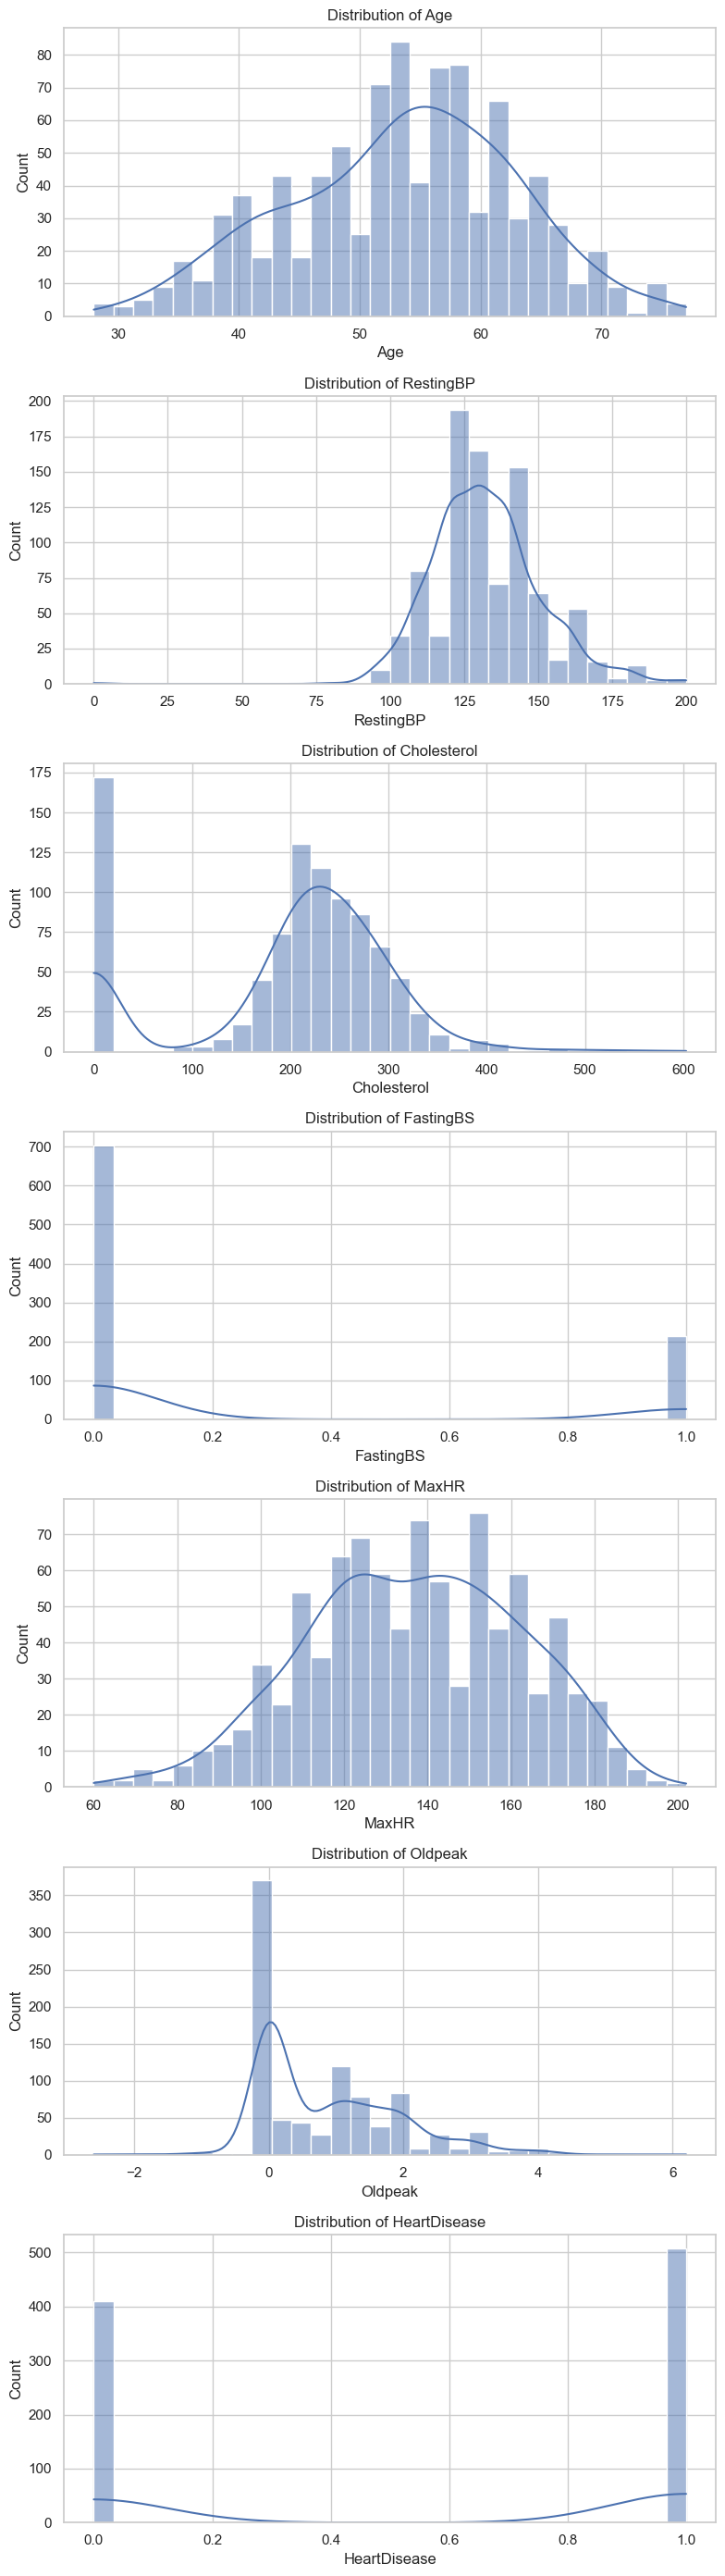

In [15]:
# Set the plot style
sns.set_theme(style="whitegrid")

# Create subplots based on the number of numerical features
fig, axes = plt.subplots(nrows=len(numerical_features.columns.to_list()), ncols=1, figsize=(8, 4 * len(numerical_features.columns.to_list())))

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features.columns.to_list()):
    sns.histplot(data[feature], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

### Target Variable Visualization (HeartDisease)

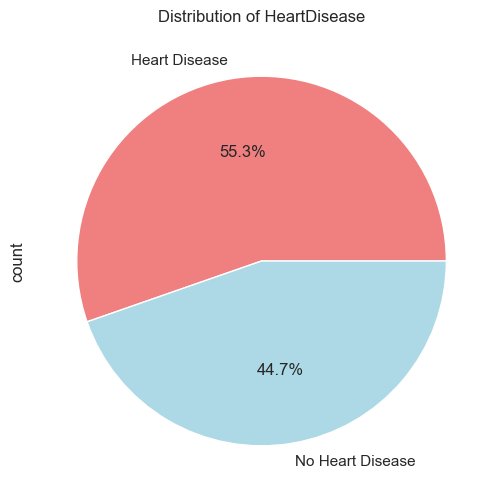

In [17]:
target_variable = 'HeartDisease'

# Plot a pie chart for the binary target variable
plt.figure(figsize=(6, 6))
data[target_variable].value_counts().plot.pie(autopct='%1.1f%%', labels=['Heart Disease', 'No Heart Disease'], colors=['lightcoral', 'lightblue'])
plt.title(f'Distribution of {target_variable}')
plt.show()

The dataset is pretty much evenly balanced!

### Age vs Heart Disease

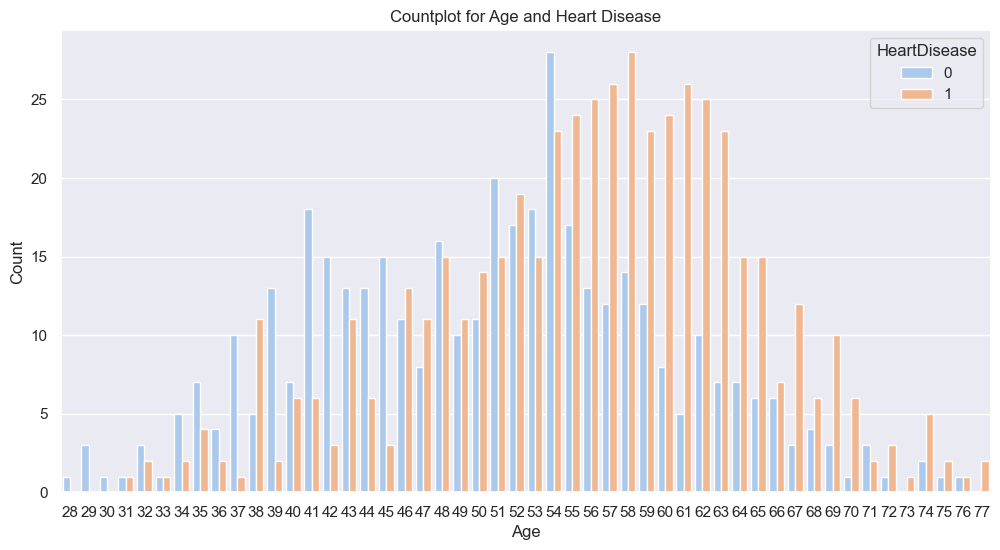

In [18]:
# Set the plot style (optional)
sns.set_theme(style="darkgrid")

# Plot a countplot for age and heart disease
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue=target_variable, data=data, palette='pastel')
plt.title('Countplot for Age and Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Sex vs Heart Disease

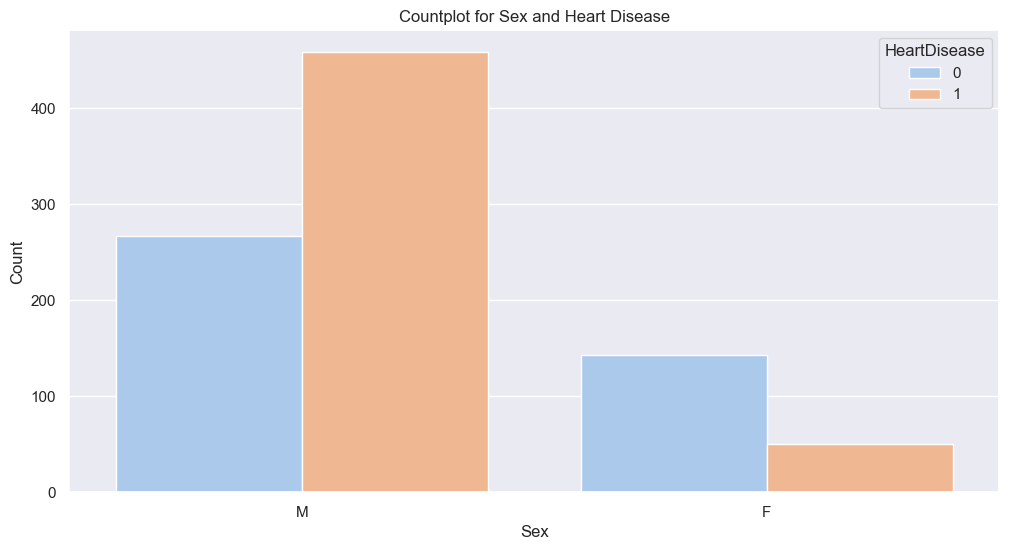

In [19]:
# Set the plot style (optional)
sns.set_theme(style="darkgrid")

# Plot a countplot for sex and heart disease
plt.figure(figsize=(12, 6))
sns.countplot(x='Sex', hue=target_variable, data=data, palette='pastel')
plt.title('Countplot for Sex and Heart Disease')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### Summary of EDA

Features for positive cases of heart disease :
Categorical Features (Order) :

Sex : Male > Female

Numerical Features (Range) :

Age : 50+

Now that we have understood the typical values of the features, we move on to the next step where we select the appropriate features for modeling!

## 3) DATA PREPROCESSING AND CLEANING

### Categorical Features to Numerical Values

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Sex'] = le.fit_transform(data['Sex'])
data['ChestPainType'] = le.fit_transform(data['ChestPainType'])
data['RestingECG'] = le.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = le.fit_transform(data['ST_Slope'])

### Correlation Matrix

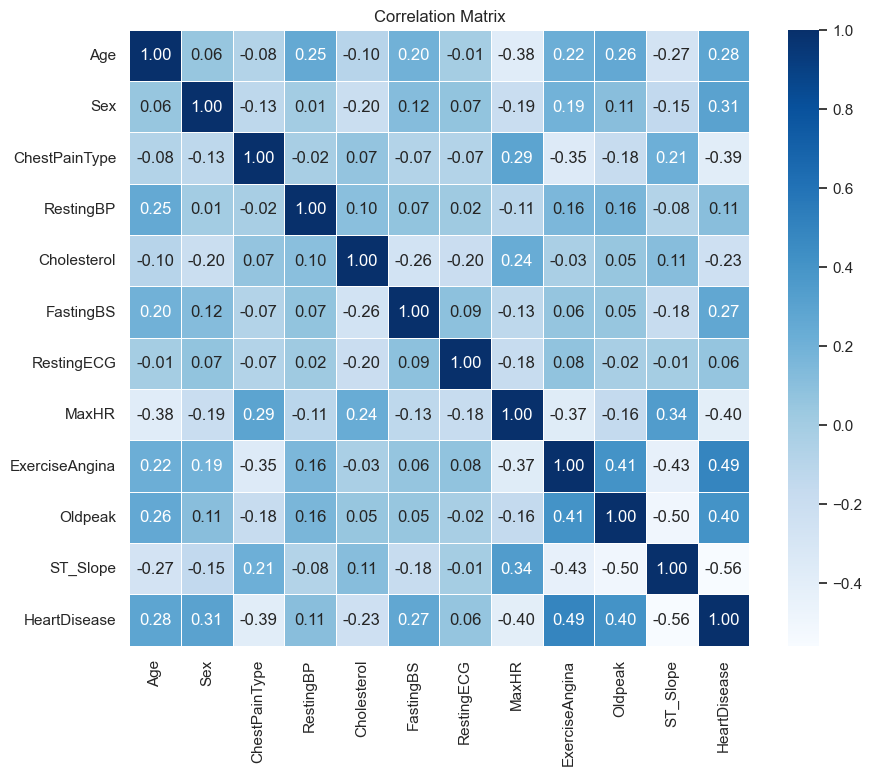

In [21]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set the plot style (optional)
sns.set_theme(style="whitegrid")

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Correlation with Heart Disease

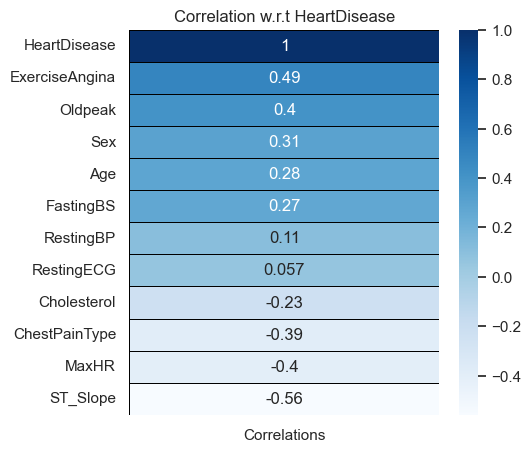

In [22]:
# Calculate the correlations of each feature with 'HeartDisease' and sort in descending order
corr = data.corrwith(data[target_variable]).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

# Create a heatmap for the correlations
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', linewidths=0.4, linecolor='black')

# Set title for the heatmap
plt.title('Correlation w.r.t HeartDisease')

# Display the heatmap
plt.show()

## 4) FEATURE SELECTION AND ENGINEERING

### Feature Selection for Categorical Features :

In [ ]:
# droping according to correaltion
Features = data.drop(columns=['RestingECG', 'RestingBP'])

## 5) TRAINING AND EVALUATION

In [68]:
from sklearn.model_selection import train_test_split

### Splitting Data

In [39]:
# Splitting the Data
X = Features.drop(columns=target_variable) # Descriptive features
y = Features[target_variable] # Target feature

# Splitting the dataset into training and testing sets(80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


## 6) MODEL IMPLEMENTATION AND ACCURACY

### Decision Tree Classifier

In [69]:
from sklearn.tree import DecisionTreeClassifierfrom
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


### Implementation(DT)

In [60]:

modelD = DecisionTreeClassifier(random_state=1000, max_depth=4, min_samples_leaf=1)
modelD.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1000)

### Evaluation(DT)

In [61]:
# Model Evaluation
predictionsD = modelD.predict(X_test)
dt_accuracy = accuracy_score(y_test, predictionsD)

print("Model Accuracy: {:.2f}%".format(dt_accuracy * 100))

Model Accuracy: 84.78%


### K-Nearest Neighbors Classifier

### Implmentation(KNN)

In [62]:

modelK = KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)
modelK.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)

### Evaluation(KNN)

In [63]:
# Model Evaluation

predictionsK = modelK.predict(X_test)
knn_accuracy = accuracy_score(y_test, predictionsK)

print("Model Accuracy: {:.2f}%".format(knn_accuracy * 100))

Model Accuracy: 73.37%


### Comparision of DT & KNN

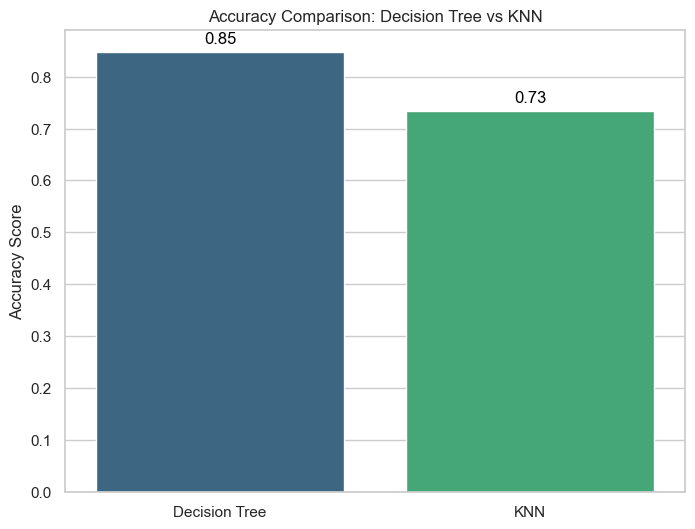

In [64]:
# Create a bar plot for accuracy comparison
models = ['Decision Tree', 'KNN']
accuracies = [dt_accuracy, knn_accuracy]

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=models, y=accuracies, palette='viridis')

# Annotate the bars with accuracy scores
for i, accuracy in enumerate(accuracies):
    barplot.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.title('Accuracy Comparison: Decision Tree vs KNN')
plt.ylabel('Accuracy Score')
plt.show()

### Observations

Decision Tree Classifier performed well.

K-Nearest Neighbors Classifier had slightly lower accuracy.

## The End!